# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Unit type- metric or imperial
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | kuanda
Processing Record 3 of Set 1 | katav-ivanovsk
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | fiambala
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | walvis bay
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | kuching
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | ardestan
Processing Record 21 of Set 1 | mammoth lakes
Pr

Processing Record 36 of Set 4 | nova sintra
Processing Record 37 of Set 4 | xilin hot
Processing Record 38 of Set 4 | new norfolk
Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | dzhalagash
Processing Record 41 of Set 4 | blackwater
Processing Record 42 of Set 4 | ketovo
Processing Record 43 of Set 4 | muynoq
Processing Record 44 of Set 4 | mili
Processing Record 45 of Set 4 | mega
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | lewiston orchards
Processing Record 49 of Set 4 | nezhinka
Processing Record 0 of Set 5 | klyuchi
Processing Record 1 of Set 5 | kurchatov
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | urangan
Processing Record 4 of Set 5 | gemena
Processing Record 5 of Set 5 | kokshetau
Processing Record 6 of Set 5 | fada
Processing Record 7 of Set 5 | eyl
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | sao vicente
Processing Record 10 of 

Processing Record 32 of Set 8 | mhamid
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | angaur state
Processing Record 35 of Set 8 | kodinsk
Processing Record 36 of Set 8 | cafayate
Processing Record 37 of Set 8 | tawau
Processing Record 38 of Set 8 | malvan
Processing Record 39 of Set 8 | morant bay
Processing Record 40 of Set 8 | kerema
Processing Record 41 of Set 8 | acapulco de juarez
Processing Record 42 of Set 8 | horta
Processing Record 43 of Set 8 | zagora
Processing Record 44 of Set 8 | amarante do maranhao
Processing Record 45 of Set 8 | chyorny yar
Processing Record 46 of Set 8 | umba
Processing Record 47 of Set 8 | port blair
Processing Record 48 of Set 8 | shofirkon shahri
City not found. Skipping...
Processing Record 49 of Set 8 | ritchie
Processing Record 0 of Set 9 | bargara
City not found. Skipping...
Processing Record 1 of Set 9 | ponferrada
Processing Record 2 of Set 9 | bereket
Processing Record 3 of Set 9 | port shepstone
Processing Record 4 o

Processing Record 19 of Set 12 | tabou
Processing Record 20 of Set 12 | lawas
Processing Record 21 of Set 12 | indramayu
Processing Record 22 of Set 12 | rikaze
Processing Record 23 of Set 12 | liwale
Processing Record 24 of Set 12 | malmberget
Processing Record 25 of Set 12 | tavda
Processing Record 26 of Set 12 | basco
Processing Record 27 of Set 12 | llandudno
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,13.44,77,0,6.98,ZA,1698703439
1,kuanda,56.3161,116.0806,-12.67,55,37,0.29,RU,1698703494
2,katav-ivanovsk,54.7531,58.1956,-2.84,95,100,2.87,RU,1698703494
3,port-aux-francais,-49.3500,70.2167,2.80,92,99,17.75,TF,1698703490
4,fiambala,-27.6871,-67.6149,23.45,26,57,3.85,AR,1698703495


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,13.44,77,0,6.98,ZA,1698703439
1,kuanda,56.3161,116.0806,-12.67,55,37,0.29,RU,1698703494
2,katav-ivanovsk,54.7531,58.1956,-2.84,95,100,2.87,RU,1698703494
3,port-aux-francais,-49.3500,70.2167,2.80,92,99,17.75,TF,1698703490
4,fiambala,-27.6871,-67.6149,23.45,26,57,3.85,AR,1698703495


In [22]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        550 non-null    object 
 1   Lat         550 non-null    float64
 2   Lng         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    int64  
 5   Cloudiness  550 non-null    int64  
 6   Wind Speed  550 non-null    float64
 7   Country     546 non-null    object 
 8   Date        550 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.0+ KB


In [48]:
# convert to int using to_numeric
city_data_df[["Lat", "Lng", "Max Temp", "Wind Speed"]] = city_data_df[["Lat", "Lng", "Max Temp", "Wind Speed"]].apply(pd.to_numeric)

city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        550 non-null    object 
 1   Lat         550 non-null    float64
 2   Lng         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    int64  
 5   Cloudiness  550 non-null    int64  
 6   Wind Speed  550 non-null    float64
 7   Country     546 non-null    object 
 8   Date        550 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.0+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

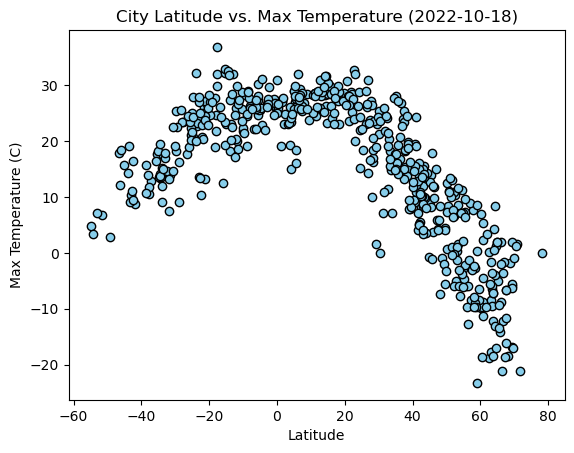

In [52]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat, max_temp, edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

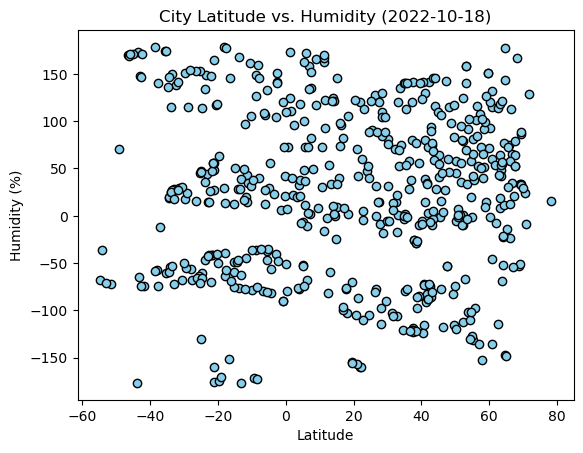

In [53]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lat, lon, edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

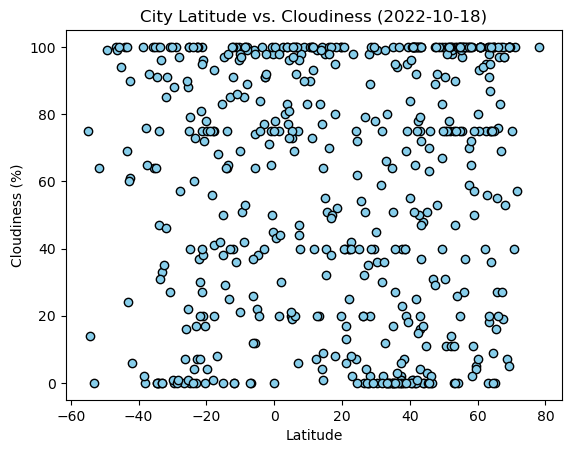

In [54]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lat, cloudiness, edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

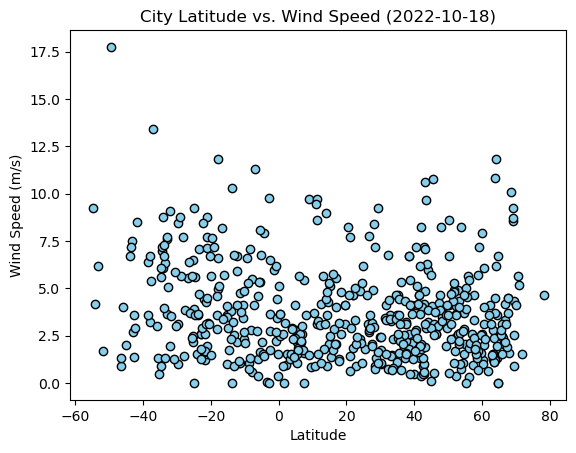

In [55]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat, wind_speed, edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
# Source: https://github.com/bbixby/python-api-challenge/blob/master/WeatherPy/WeatherPy.ipynb

#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kuanda,56.3161,116.0806,-12.67,55,37,0.29,RU,1698703494
2,katav-ivanovsk,54.7531,58.1956,-2.84,95,100,2.87,RU,1698703494
6,tiksi,71.6872,128.8694,-21.06,100,57,1.51,RU,1698703495
8,bethel,41.3712,-73.4140,12.93,86,100,4.63,US,1698703495
10,iqaluit,63.7506,-68.5145,-12.15,72,75,10.80,CA,1698703495


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,13.44,77,0,6.98,ZA,1698703439
3,port-aux-francais,-49.3500,70.2167,2.80,92,99,17.75,TF,1698703490
4,fiambala,-27.6871,-67.6149,23.45,26,57,3.85,AR,1698703495
5,east london,-33.0153,27.9116,14.02,80,33,3.64,ZA,1698703235
7,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1698703495


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8716741375874666
y = -0.61x + 35.04


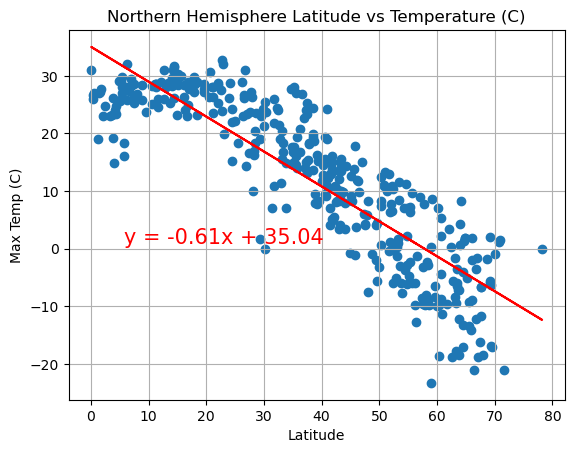

In [70]:
# Linear regression on Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Max Temp (C)"
plt.title(f'Northern Hemisphere Latitude vs Temperature (C)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show()

The r-square is 0.7459084183076885
y = 0.38x + 29.49


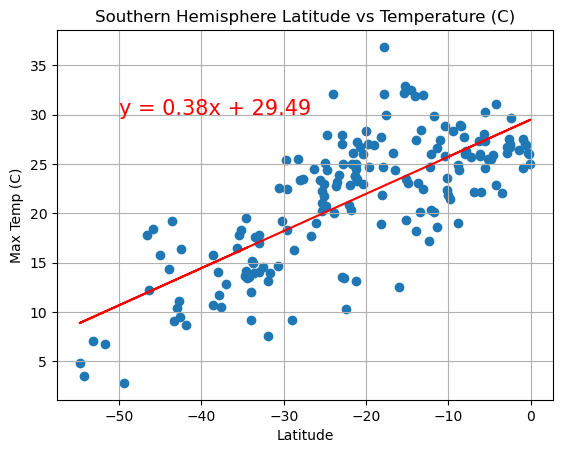

In [74]:
# Linear regression on Southern Hemisphere
#set the data sets to compare
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 30

#label the y axis
y_label = "Max Temp (C)"
plt.title(f'Southern Hemisphere Latitude vs Temperature (C)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

**Discussion about the linear relationship:**
There is a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.2038542774461509
y = 0.22x + 63.79


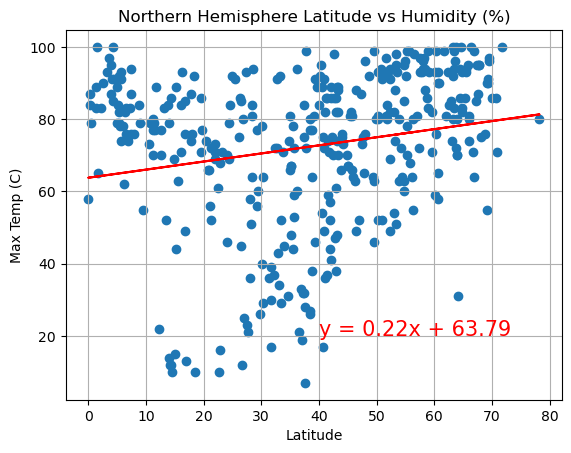

In [77]:
# Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = 40
regEQplotY = 20

#label the y axis
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity (%)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

The r-square is 0.0943146328999406
y = 0.13x + 74.34


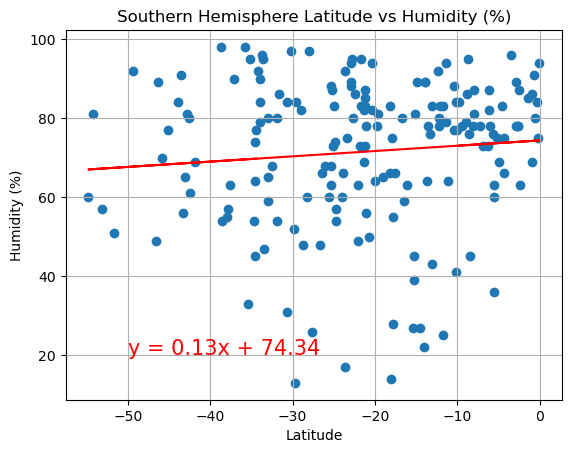

In [79]:
# Southern Hemisphere
#set the data sets to compare
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 20

#label the y axis
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity (%)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

**Discussion about the linear relationship:** 
Negligible correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.07497654223962405
y = 0.15x + 51.65


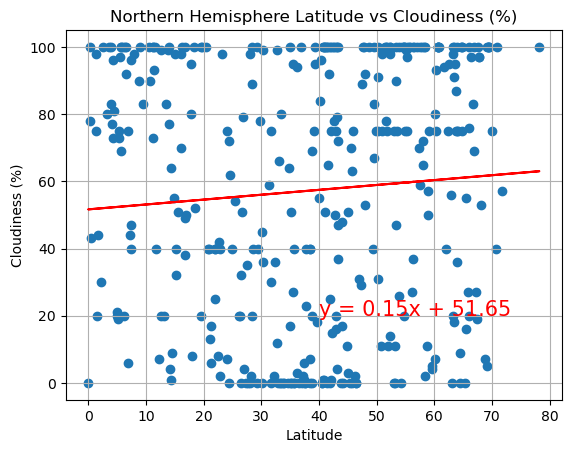

In [89]:
# Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#tweak where the equation appears on the plot
regEQplotX = 40
regEQplotY = 20

#label the y axis
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

The r-square is 0.06998462487997971
y = 0.2x + 61.82


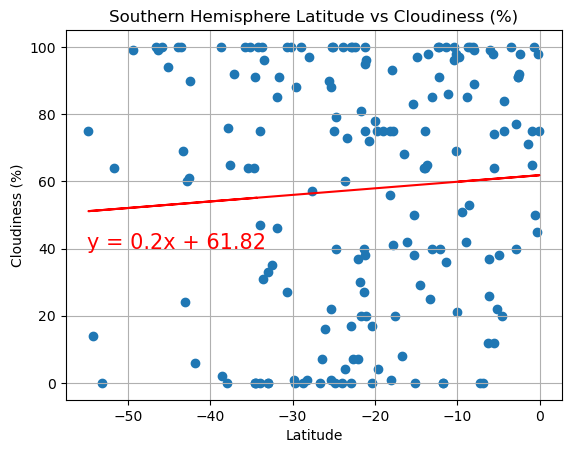

In [84]:
# Southern Hemisphere
#set the data sets to compare
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#tweak where the equation appears on the plot
regEQplotX = -55
regEQplotY = 40

#label the y axis
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness (%)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

**Discussion about the linear relationship:**
Negligible correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.06920542852791683
y = 0.01x + 3.0


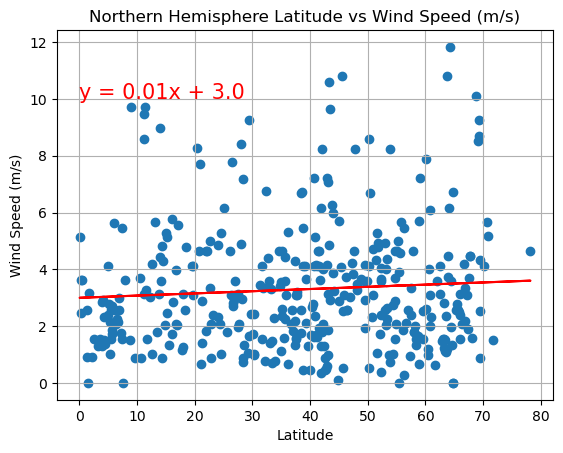

In [90]:
# Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 10

#label the y axis
y_label = "Wind Speed (m/s)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed (m/s)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

The r-square is -0.20618751482153955
y = -0.04x + 3.37


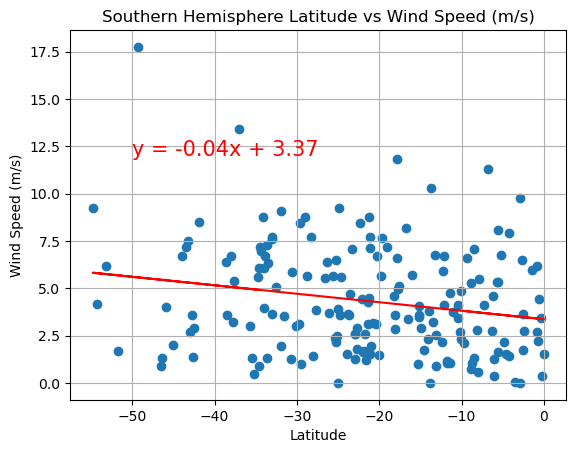

In [91]:
# Southern Hemisphere
#set the data sets to compare
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#tweak where the equation appears on the plot
regEQplotX = -50
regEQplotY = 12

#label the y axis
y_label = "Wind Speed (m/s)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed (m/s)')

#run the function with all 5 variables
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()

**Discussion about the linear relationship:**
Negligible correlation between latitude and wind speed.